Student name: Modupeola Oyatokun

Student ID: C0895705

MACHINING LEARNING ASSIGNMENT USING ALGERIAN FOREST FIRE DATASET

**DATA DESCRIPTION**
1. Day:Date of the day
2. month:('June' to 'September')
3. year(2012): Weather data observations
4. Temp: temperature noon (temperature max) in Celsius degrees: 22 to 42
5. RH: Relative Humidity in %: 21 to 90
6. Ws: Wind speed in km/h: 6 to 29
7. Rain: total day in mm: 0 to 16.8
8. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
9. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
10. Drought Code (DC) index from the FWI System: 7 to 220.4
11. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
12. Buildup Index (BUI) index from the FWI system: 1.1 to 68
13. Fire Weather Index (FWI) Index: 0 to 31.1
14. Classes: two classes, namely fire and not fire

In [105]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
# import the dataset from local machine
df = pd.read_csv('/content/Algerian_forest_fires_cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [107]:
#Information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [108]:
#The shape or dimension of the dataframe
df.shape

(243, 15)

#CLEAN THE DATASET

In [109]:
#Check and count for null values in the data
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [110]:
#display null values in the dataframe
df[df.isnull().any(axis=1)]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [111]:
# change class fire to 1 and not fire to 0
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)
df[["Classes"]].value_counts()

Classes
1          137
0          106
Name: count, dtype: int64

In [112]:
#check for duplicate
df.duplicated().sum()

0

#Visualizations

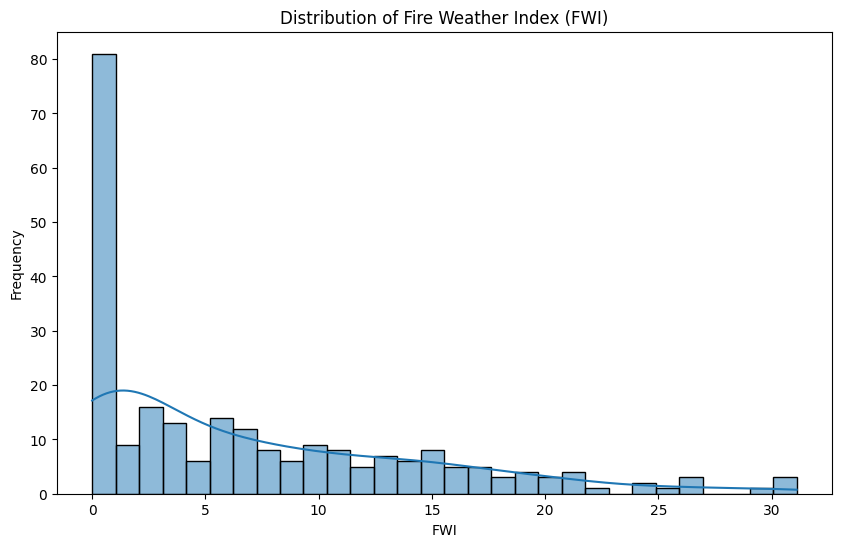

In [113]:
#Visualize with Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['FWI'], kde=True, bins=30)
plt.title('Distribution of Fire Weather Index (FWI)')
plt.xlabel('FWI')
plt.ylabel('Frequency')
plt.show()

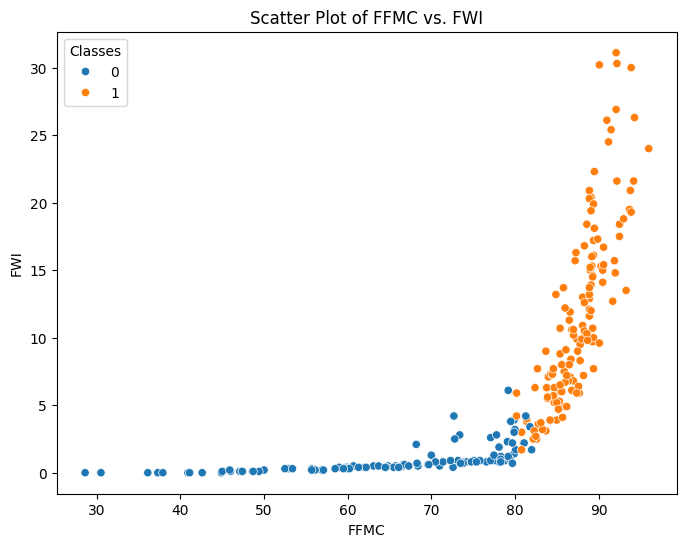

In [114]:
# make a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='FFMC', y='FWI', hue='Classes', data=df)
plt.xlabel('FFMC')
plt.ylabel('FWI')
plt.title('Scatter Plot of FFMC vs. FWI')
plt.show()

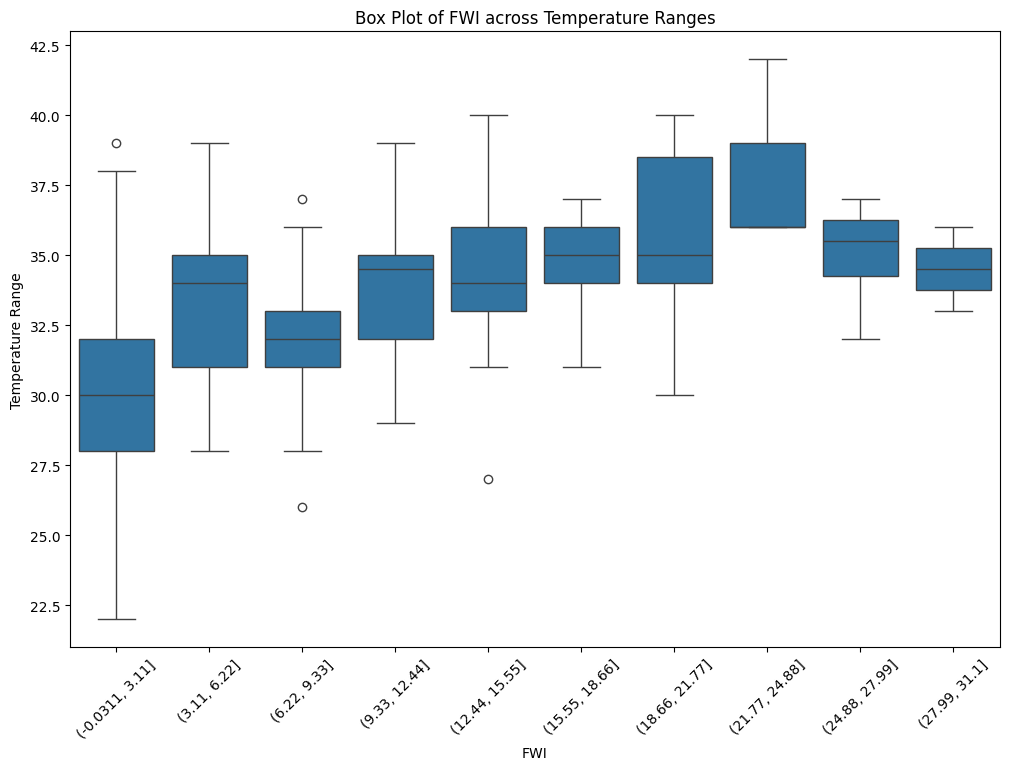

In [115]:
#Box plot of FWI across different ranges of Temperature
plt.figure(figsize=(12, 8))
sns.boxplot(x=pd.cut(df['FWI'], bins=10), y=df['Temperature'])
plt.xticks(rotation=45)
plt.title('Box Plot of FWI across Temperature Ranges')
plt.xlabel('FWI')
plt.ylabel('Temperature Range')
plt.show()

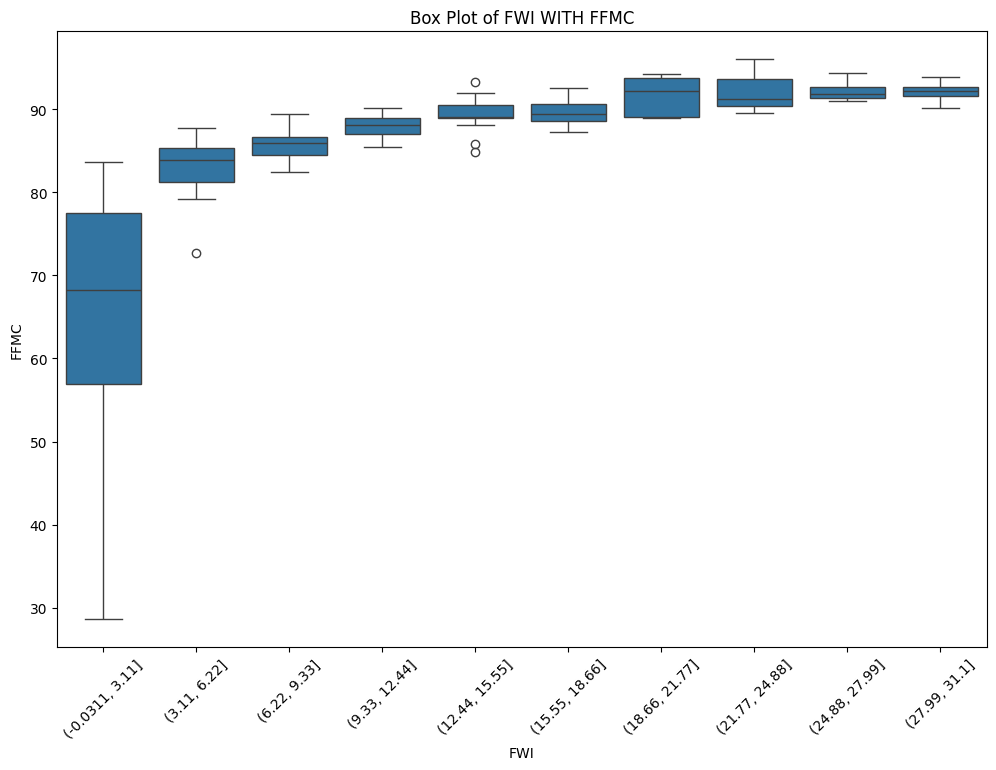

In [116]:
#Box plot of FWI with FFMC
plt.figure(figsize=(12, 8))
sns.boxplot(x=pd.cut(df['FWI'], bins=10), y=df['FFMC'])
plt.xticks(rotation=45)
plt.title('Box Plot of FWI WITH FFMC')
plt.xlabel('FWI')
plt.ylabel('FFMC')
plt.show()

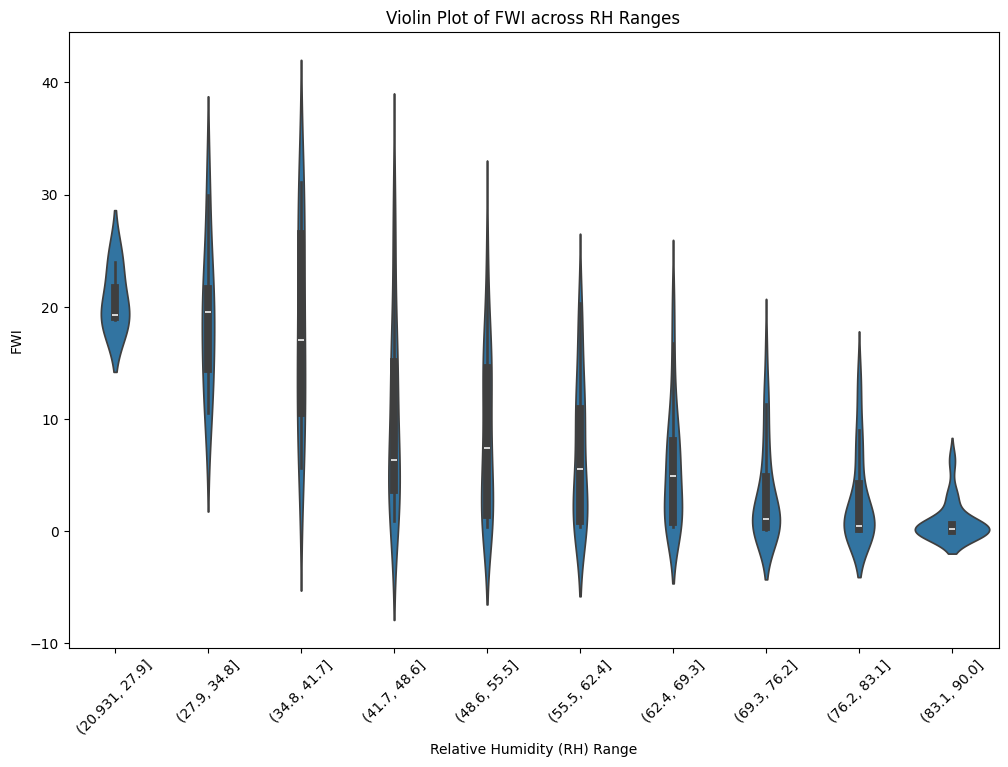

In [117]:
#Violin plot of FWI across different ranges of Relative Humidity (RH)
plt.figure(figsize=(12, 8))
sns.violinplot(x=pd.cut(df['RH'], bins=10), y=df['FWI'])
plt.xticks(rotation=45)
plt.title('Violin Plot of FWI across RH Ranges')
plt.xlabel('Relative Humidity (RH) Range')
plt.ylabel('FWI')
plt.show()

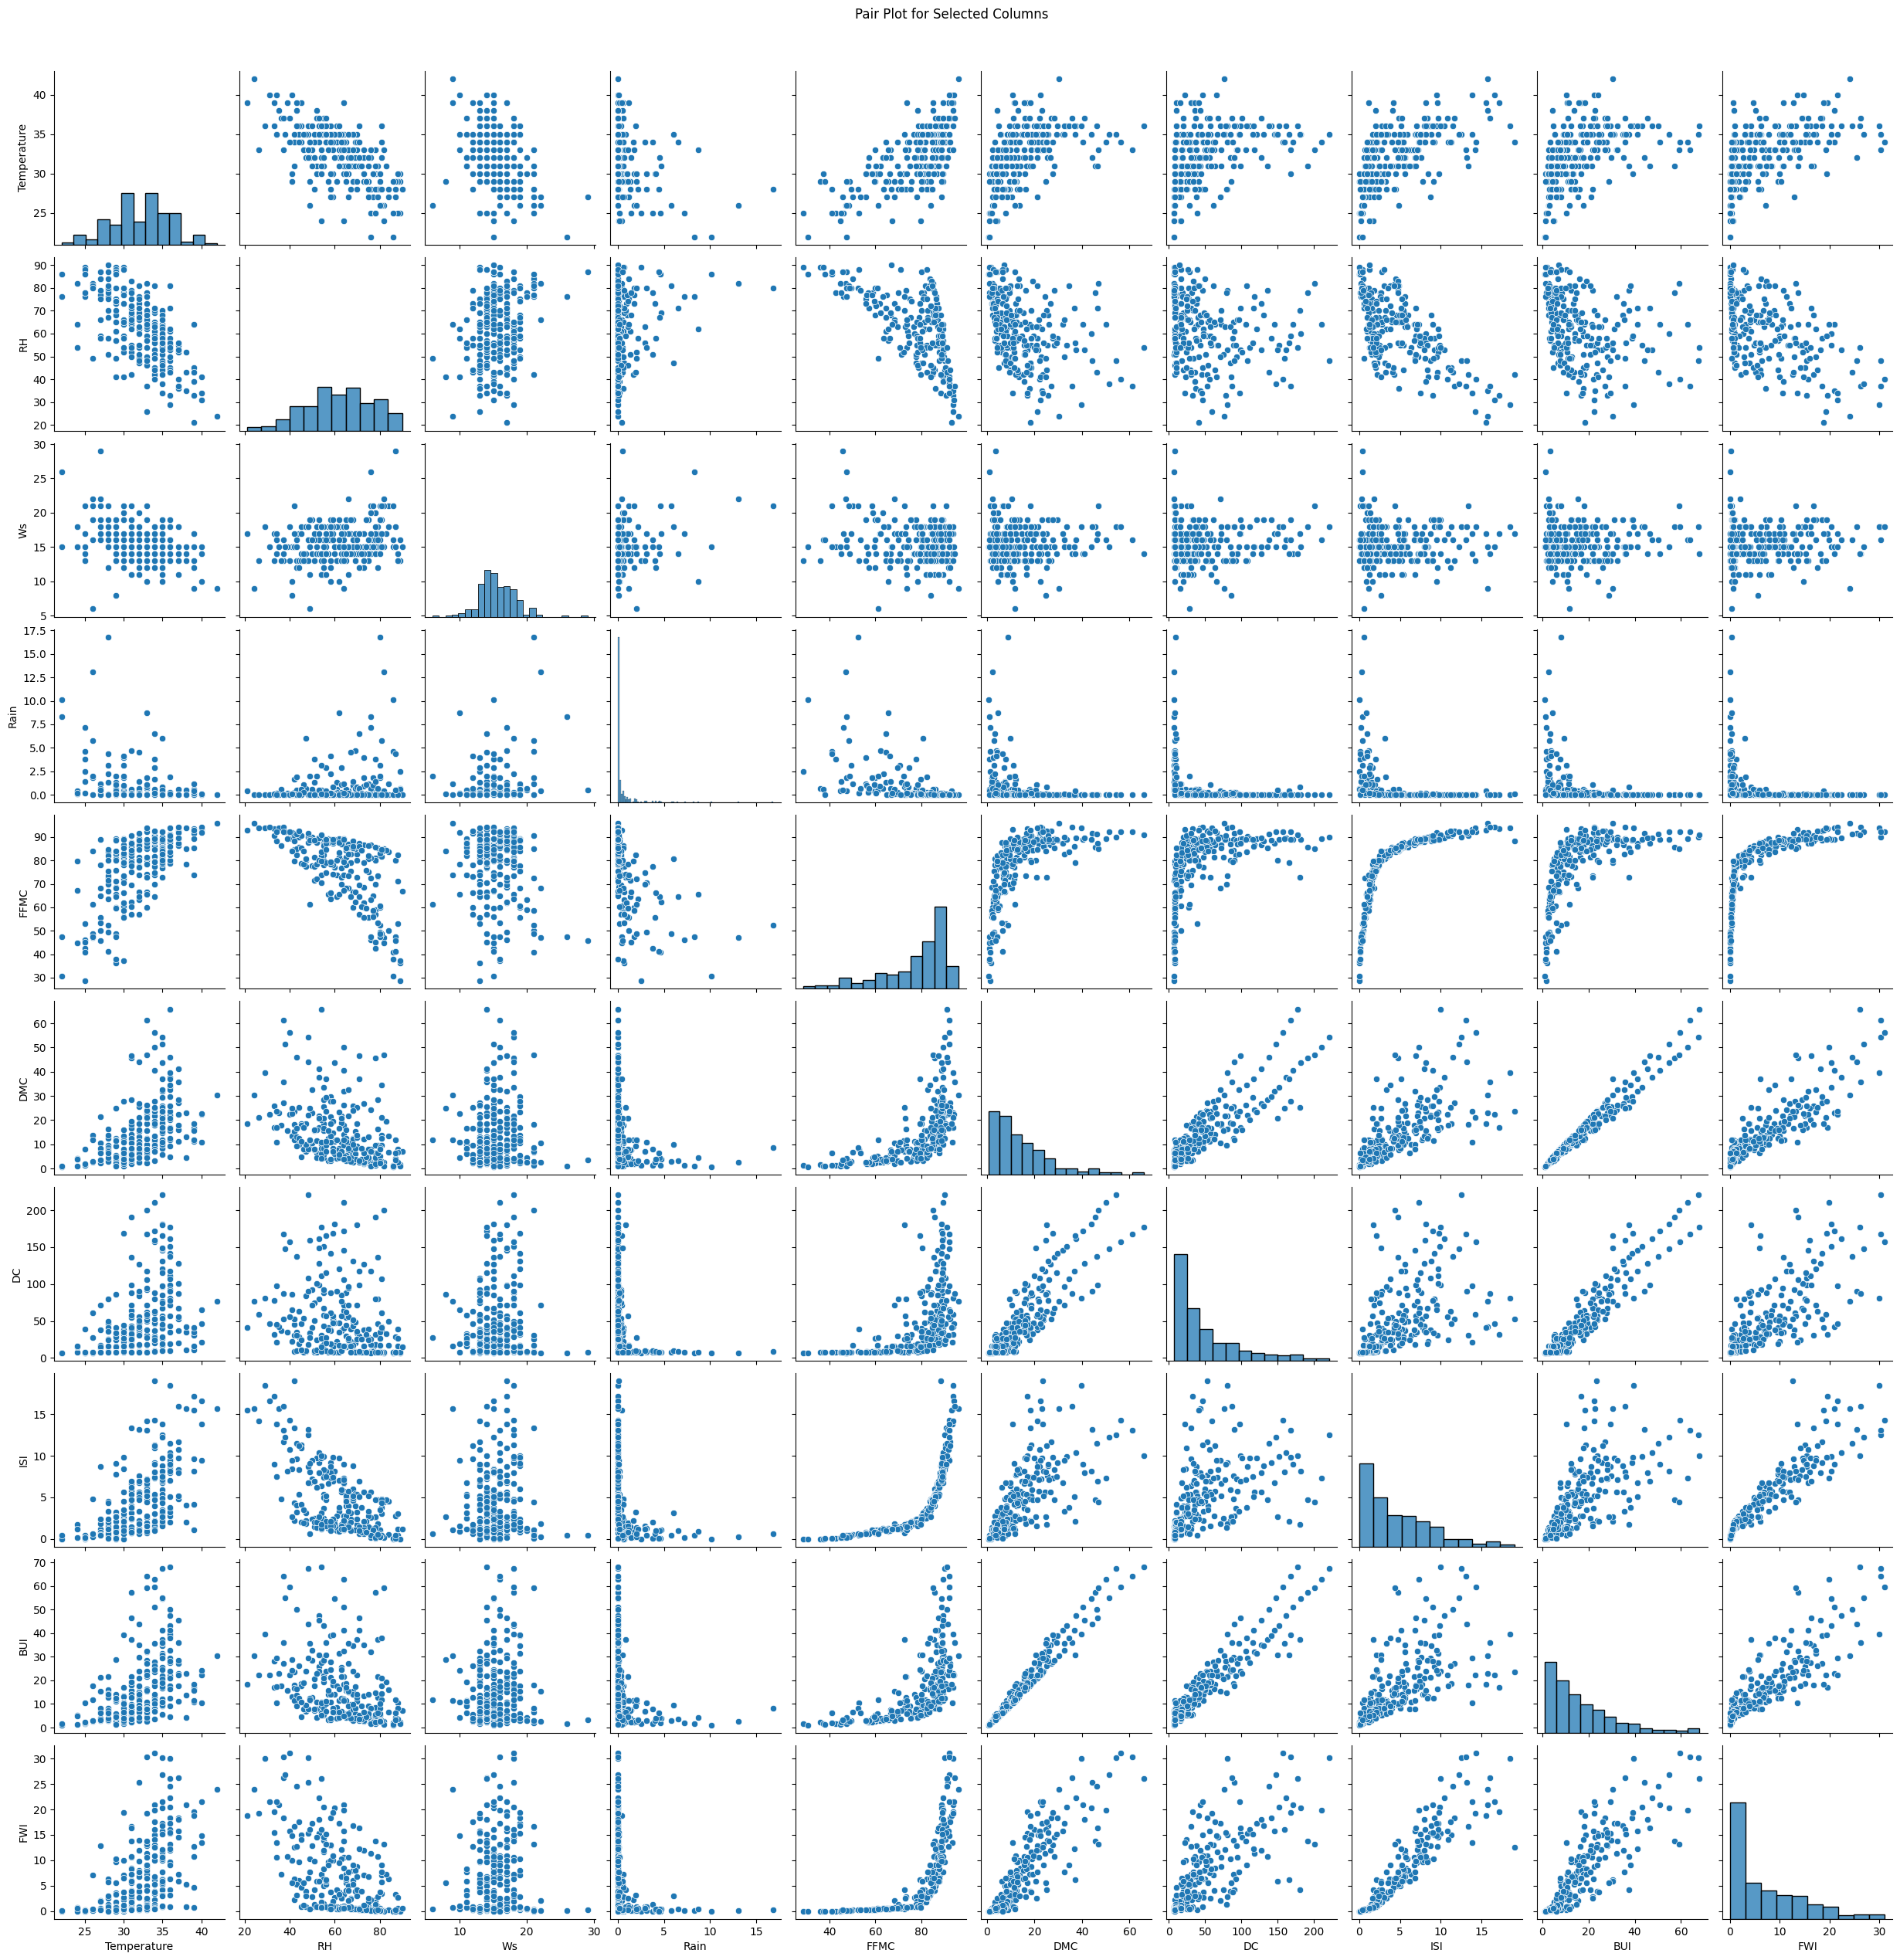

In [118]:
#To show relationships in terms of scatter plot of FWI with other features,
selected_columns = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
sns.pairplot(df[selected_columns])
plt.suptitle('Pair Plot for Selected Columns', y=1.02)
plt.show()

CORRELLATION MATRIX



<Axes: >

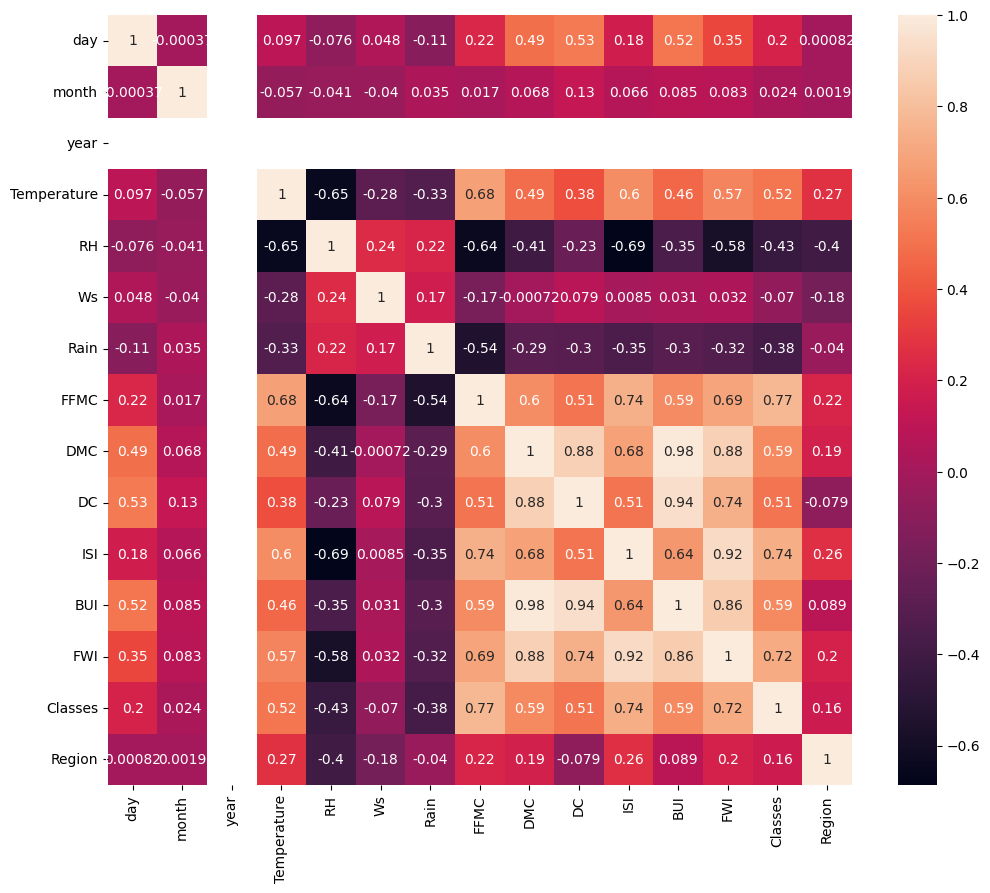

In [119]:
#A heatmap to show how FWI correlates with other numerical features.
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)


In [120]:
#Sine the year is coming out blank on the correlation, then we drop the year
df = df.drop(columns=['year'])

<Axes: >

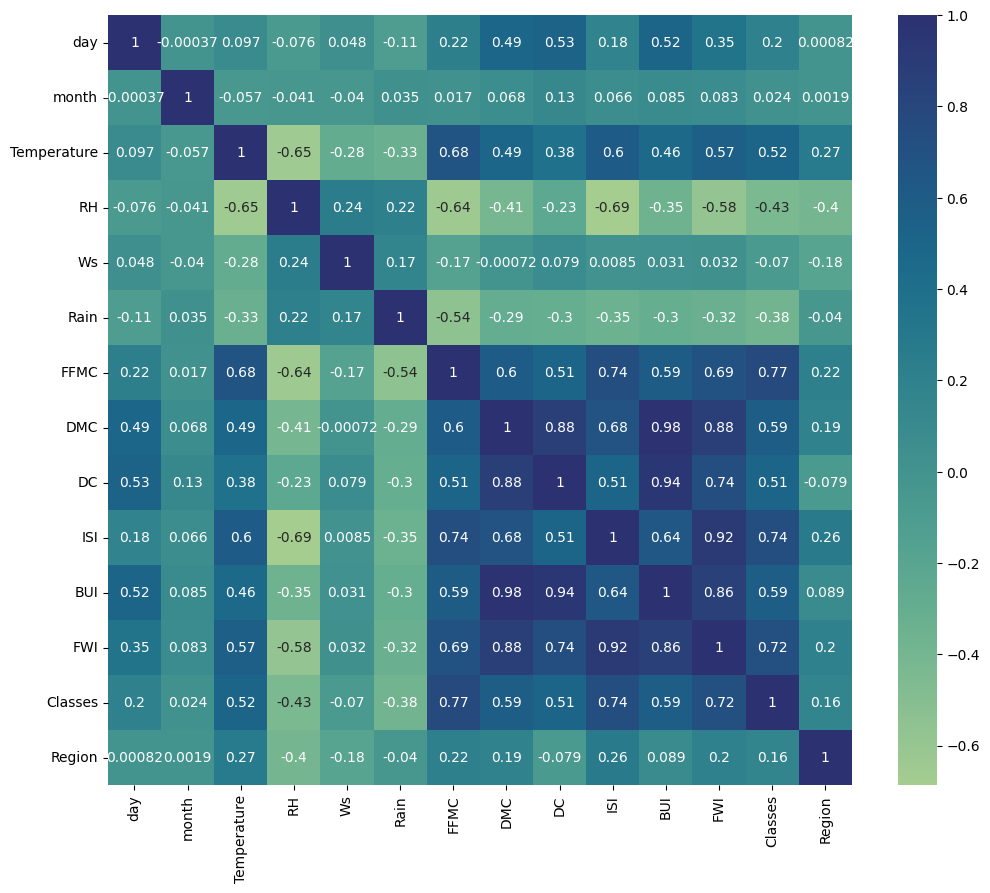

In [121]:
#replot the correlation matrix after droping year
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='crest')


FEATURED SELECTION

In [122]:
# drop these column because they will not have any effect in the model
df.drop(['day','month','Region'],axis=1,inplace =True)


In [123]:
# split my data into input and target variables
x = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']]# input Variables
x =df.drop('FWI',axis=1)
y = df[['FWI']]# Target/output variable

In [124]:
x.shape, y.shape

((243, 10), (243, 1))

In [125]:
# import libray for model spilt
from sklearn.model_selection import train_test_split

In [126]:
# Split the dataset into training (80%) and testing (20%) sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<Axes: >

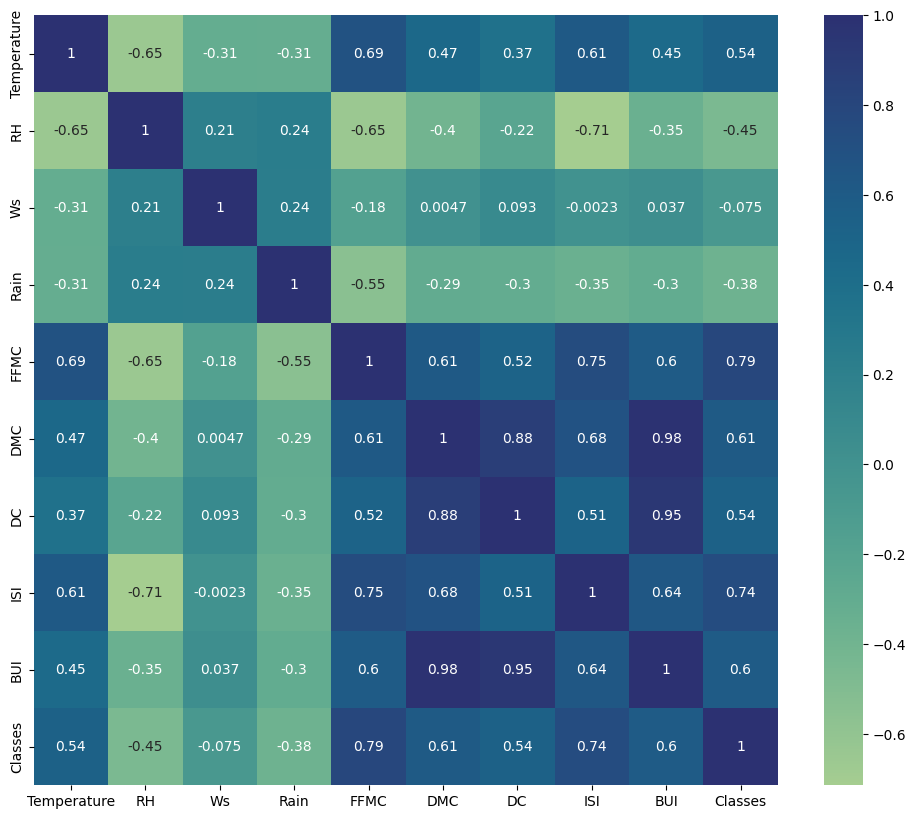

In [127]:
# check for multicolinearity
from re import X
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr, annot=True, cmap='crest')

In [128]:
# Features scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train =scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

MODEL BUILDING

Multiple Linear Regression

In [129]:
#Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [130]:
# Train the model
lr = LinearRegression()
lr.fit(x_train, y_train)



LinearRegression()

In [131]:
lr.coef_, lr.intercept_


(array([[-6.52439376e-02, -1.58037619e-01, -7.65359198e-02,
          4.77559495e-03, -8.88062783e-01,  2.70892088e-01,
         -2.91330689e-01,  5.10254142e+00,  3.78564024e+00,
          2.72331440e-01]]),
 array([7.42010309]))

In [132]:
#predict
y_pred=lr.predict(x_test)
y_pred

array([[ 8.16868001],
       [ 7.27176568],
       [ 0.11156401],
       [ 5.37776507],
       [ 6.66826953],
       [ 1.52751229],
       [ 2.4599331 ],
       [ 7.49446757],
       [ 1.828717  ],
       [ 3.01408891],
       [-0.08441847],
       [ 6.85490872],
       [ 9.62780404],
       [16.42267682],
       [19.02363526],
       [ 1.41521408],
       [ 2.26400763],
       [-0.07034692],
       [ 6.58031643],
       [ 3.27278496],
       [ 1.14665488],
       [ 0.13789078],
       [ 6.25332883],
       [-0.03786896],
       [21.17154591],
       [ 4.99895317],
       [ 5.71002518],
       [ 9.83487009],
       [ 0.10900719],
       [ 9.81301827],
       [ 6.18178764],
       [ 0.03544276],
       [10.11405699],
       [14.95695962],
       [ 1.14267278],
       [ 0.80431479],
       [ 1.69449853],
       [ 6.21318695],
       [-0.05684366],
       [-0.28762081],
       [ 6.93502815],
       [ 1.42194195],
       [ 8.26514934],
       [-0.41605787],
       [15.28916413],
       [ 7

In [133]:
# evaluate the model using metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f'R2 Score: {r2_score(y_test, y_pred)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')

print(f'MSE: {mean_squared_error(y_test, y_pred)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

R2 Score: 0.9894422521436343
MAE: 0.4123251108618592
MSE: 0.31998867202691195
RMSE: 0.5656754122523905


Polynomial Regression

In [134]:
#import the library
from sklearn.preprocessing import PolynomialFeatures

In [135]:
poly= PolynomialFeatures(degree=2, include_bias= False)

x_poly= poly.fit_transform(x)

In [136]:
x_poly.shape

(243, 65)

In [137]:
#Split the data set to test and train

x_train_poly, x_test_poly, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [138]:
# Train the model
lr.fit(x_train_poly, y_train)

LinearRegression()

In [139]:
y_pred_poly= lr.predict(x_test_poly)

In [140]:
#calculate the metrics
print(f'R2 Score: {r2_score(y_test, y_pred_poly)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred_poly)}')

print(f'MSE: {mean_squared_error(y_test, y_pred_poly)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly))}')

R2 Score: 0.9894422521436343
MAE: 0.41232511086185886
MSE: 0.31998867202691067
RMSE: 0.5656754122523894


REGULARIZATION MODELS

In [141]:
#Ridge Regression is used to handle overfitting

from sklearn.linear_model import Ridge, Lasso, ElasticNet

rd=Ridge(alpha=0.001)

rd.fit(x_train, y_train)

y_pred_rd= rd.predict(x_test)


In [142]:
print(f'R2 Score: {r2_score(y_test, y_pred_rd)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred_rd)}')

print(f'MSE: {mean_squared_error(y_test, y_pred_rd)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rd))}')

R2 Score: 0.9894281813553147
MAE: 0.412553074241396
MSE: 0.3204151354100147
RMSE: 0.5660522373509487


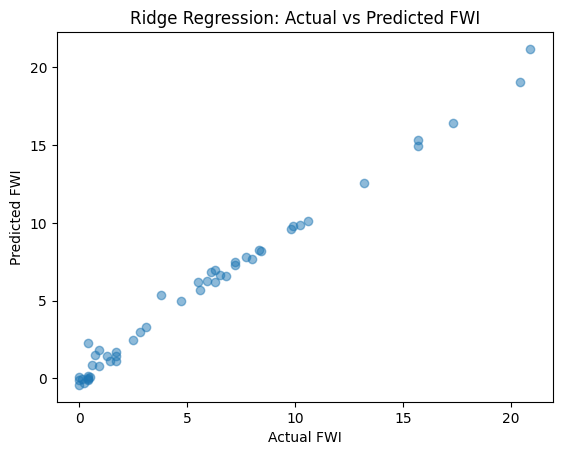

In [143]:
#Scatter diagram Actual vs Predicted FWI
plt.scatter(y_test, y_pred_rd, alpha=0.5)
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Ridge Regression: Actual vs Predicted FWI')
plt.show()

The scatter plot is used to visually assess the performance of the model. The model's predictions seems perfect as most of the points lie on the line
indicating that the predicted values match the actual values perfectly. The closer the points are to this line, the better the model's predictions.

In [144]:
#Lasso Regression is used for feature elimination

ls=Lasso(alpha=0.09)

ls.fit(x_train, y_train)

y_pred_ls= ls.predict(x_test)

print(f'R2 Score: {r2_score(y_test, y_pred_ls)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred_ls)}')

print(f'MSE: {mean_squared_error(y_test, y_pred_ls)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ls))}')

R2 Score: 0.9832574029347076
MAE: 0.5262035328844175
MSE: 0.5074416887096217
RMSE: 0.7123494147604964


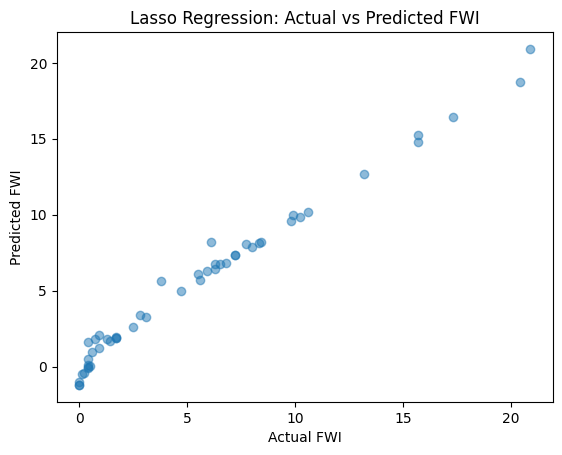

In [145]:
#Scatter diagram Actual vs Predicted FWI
plt.scatter(y_test, y_pred_ls, alpha=0.5)
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Lasso Regression: Actual vs Predicted FWI')
plt.show()

The scatter plot is used to visually assess the performance of the Lasso regression model by comparing the actual FWI values (y_test) against the predicted FWI values (y_pred_ls). The model's predictions seems perfect as most of the points lie on the line indicating that the predicted values match the actual values perfectly. The closer the points are to this line, the better the model's predictions.

In [146]:
#ElasticNet Regression, is used to handle overfitting and feature elimination

en=ElasticNet(alpha=0.09, l1_ratio=1)

en.fit(x_train, y_train)

y_pred_en= en.predict(x_test)

print(f'R2 Score: {r2_score(y_test, y_pred_en)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred_en)}')

print(f'MSE: {mean_squared_error(y_test, y_pred_en)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_en))}')

R2 Score: 0.9832574029347076
MAE: 0.5262035328844175
MSE: 0.5074416887096217
RMSE: 0.7123494147604964


DECISION TREE

In [147]:
#Import libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [148]:
#Training the Decision Tree Model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [149]:
print(f'R2 Score: {r2_score(y_test, y_pred_dt)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred_dt)}')

print(f'MSE: {mean_squared_error(y_test, y_pred_dt)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_dt))}')

R2 Score: 0.9120605431979874
MAE: 0.9061224489795919
MSE: 2.6653061224489796
RMSE: 1.6325765288184746


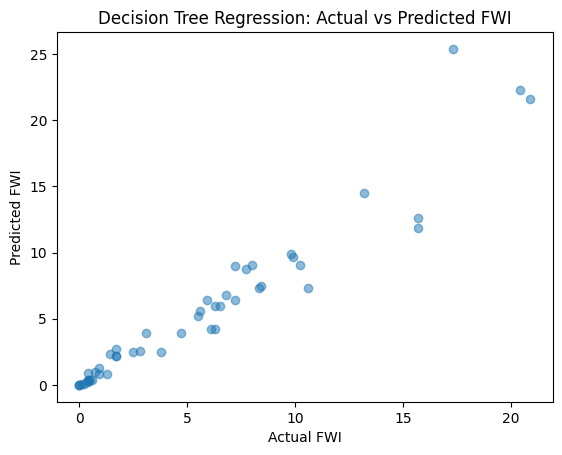

In [150]:
#plot scatter diagram to show actual to predicted

plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Decision Tree Regression: Actual vs Predicted FWI')
plt.show()

#Cross-validation and Hyperparameter tuning

Cross-validation and hyperparameter: are essential techniques used to improve the performance of a model.

Multiple linear Regression

In [151]:
#import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score

# Initialize the Multiple Linear Regression model
mlr = LinearRegression()

# Defining scoring metrics
scoring = {'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
           'R2': make_scorer(r2_score)}

# Perform 5-fold cross-validation for MAE
cv_scores_mlr_mae = cross_val_score(mlr, x_train, y_train, cv=5, scoring=scoring['MAE'])

# Perform 5-fold cross-validation for R2
cv_scores_mlr_r2 = cross_val_score(mlr, x_train, y_train, cv=5, scoring=scoring['R2'])

# Calculate the mean and standard deviation of the cross-validation scores for MAE and R2
mean_cv_score_mlr_mae = np.mean(cv_scores_mlr_mae)
std_cv_score_mlr_mae = np.std(cv_scores_mlr_mae)
mean_cv_score_mlr_r2 = np.mean(cv_scores_mlr_r2)
std_cv_score_mlr_r2 = np.std(cv_scores_mlr_r2)

print(f"Mean MAE for Multiple Linear Regression: {mean_cv_score_mlr_mae}")
print(f"Standard Deviation of MAE for Multiple Linear Regression: {std_cv_score_mlr_mae}")
print(f"Mean R2 for Multiple Linear Regression: {mean_cv_score_mlr_r2}")
print(f"Standard Deviation of R2 for Multiple Linear Regression: {std_cv_score_mlr_r2}")

Mean MAE for Multiple Linear Regression: -0.7715553766179344
Standard Deviation of MAE for Multiple Linear Regression: 0.14888854355525616
Mean R2 for Multiple Linear Regression: 0.9543894544273309
Standard Deviation of R2 for Multiple Linear Regression: 0.05443451459895297


Polynomial regression

In [152]:
#import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# a range of polynomial degrees to test
degrees = [2, 3, 4, 5]

# Create a pipeline that first creates polynomial features and then applies linear regression
pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())

# the grid of hyperparameters
param_grid = {'polynomialfeatures__degree': degrees}

# Initialize the GridSearchCV object with MAE and R2 scoring
grid_search_poly = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='MAE')

# Fit GridSearchCV to the training data
grid_search_poly.fit(x_train, y_train)

# Get the best parameters and best scores
best_degree_poly = grid_search_poly.best_params_['polynomialfeatures__degree']
best_score_poly_mae = grid_search_poly.cv_results_['mean_test_MAE'][grid_search_poly.best_index_]
best_score_poly_r2 = grid_search_poly.cv_results_['mean_test_R2'][grid_search_poly.best_index_]

print(f"Best Degree for Polynomial Regression: {best_degree_poly}")
print(f"MAE for Polynomial Regression: {best_score_poly_mae}")
print(f"R2 for Polynomial Regression: {best_score_poly_r2}")


Best Degree for Polynomial Regression: 2
MAE for Polynomial Regression: -0.31385122010862376
R2 for Polynomial Regression: 0.9869630308282394


Ridge Regression

In [153]:
# the hyperparameters for Ridge regression
ridge_params = {'alpha': [0.1, 1, 10, 100, 1000]}

# Initialize the Ridge regression model
ridge = Ridge()

# Initialize the GridSearchCV object with MAE and R2 scoring
grid_search_ridge = GridSearchCV(ridge, ridge_params, cv=5, scoring=scoring, refit='MAE')

# Fit GridSearchCV to the training data
grid_search_ridge.fit(x_train, y_train)

# To get the best parameters and best scores for Ridge
best_alpha_ridge = grid_search_ridge.best_params_['alpha']
best_score_ridge_mae = grid_search_ridge.cv_results_['mean_test_MAE'][grid_search_ridge.best_index_]
best_score_ridge_r2 = grid_search_ridge.cv_results_['mean_test_R2'][grid_search_ridge.best_index_]

print(f"Best Alpha for Ridge Regression: {best_alpha_ridge}")
print(f"MAE for Ridge Regression: {best_score_ridge_mae}")
print(f"R2 for Ridge Regression: {best_score_ridge_r2}")

Best Alpha for Ridge Regression: 0.1
MAE for Ridge Regression: -0.7687024597687742
R2 for Ridge Regression: 0.9546652706021774


Lasso Regression

In [154]:
# Define the hyperparameters for Lasso regression
lasso_params = {'alpha': [0.1, 1, 10, 100, 1000]}

# Initialize the Lasso regression model
lasso = Lasso()

# Initialize the GridSearchCV object with MAE and R2 scoring
grid_search_lasso = GridSearchCV(lasso, lasso_params, cv=5, scoring=scoring, refit='MAE')

# Fit GridSearchCV to the training data
grid_search_lasso.fit(x_train, y_train)

# To get the best parameters and best scores for Lasso
best_alpha_lasso = grid_search_lasso.best_params_['alpha']
best_score_lasso_mae = grid_search_lasso.cv_results_['mean_test_MAE'][grid_search_lasso.best_index_]
best_score_lasso_r2 = grid_search_lasso.cv_results_['mean_test_R2'][grid_search_lasso.best_index_]

print(f"Best Alpha for Lasso Regression: {best_alpha_lasso}")
print(f"MAE for Lasso Regression: {best_score_lasso_mae}")
print(f"R2 for Lasso Regression: {best_score_lasso_r2}")


Best Alpha for Lasso Regression: 0.1
MAE for Lasso Regression: -0.8483562142260027
R2 for Lasso Regression: 0.9562507358719646


Elastic Net Regression

In [155]:
#import libraries
from sklearn.linear_model import ElasticNet


# Define scoring metrics
scoring = {'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
           'R2': make_scorer(r2_score)}

# Define the hyperparameters for Elastic Net regression
elastic_net_params = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9,1]
}

# Initialize the Elastic Net regression model
elastic_net = ElasticNet()

# Initialize the GridSearchCV object with MAE and R2 scoring
grid_search_en = GridSearchCV(elastic_net, elastic_net_params, cv=5, scoring=scoring, refit='MAE')

# Fit GridSearchCV to the training data
grid_search_en.fit(x_train, y_train)

# Get the best parameters and best scores for Elastic Net
best_alpha_en = grid_search_en.best_params_['alpha']
best_l1_ratio_en = grid_search_en.best_params_['l1_ratio']
best_score_en_mae = grid_search_en.cv_results_['mean_test_MAE'][grid_search_en.best_index_]
best_score_en_r2 = grid_search_en.cv_results_['mean_test_R2'][grid_search_en.best_index_]

print(f"Best Alpha for Elastic Net: {best_alpha_en}")
print(f"Best L1 Ratio for Elastic Net: {best_l1_ratio_en}")
print(f"MAE for Elastic Net: {best_score_en_mae}")
print(f"R2 for Elastic Net: {best_score_en_r2}")


Best Alpha for Elastic Net: 0.01
Best L1 Ratio for Elastic Net: 1
MAE for Elastic Net: -0.7642588260834249
R2 for Elastic Net: 0.955056190019117


DECISION TREE

In [156]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [157]:
# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
# Initialize GridSearchCV for cross-validation and hyperparameter tuning
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=2)

In [158]:
# Extract the best parameters
best_dt = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Extract the best model
y_pred_best_dt = best_dt.predict(x_test)
r2_best_dt = r2_score(y_test, y_pred_best_dt)
mae_best_dt = mean_absolute_error(y_test, y_pred_best_dt)
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
rmse_best_dt = np.sqrt(mse_best_dt)

print(f"Best Decision Tree Regression - R² Score: {r2_best_dt}, MAE: {mae_best_dt}, MSE: {mse_best_dt}, RMSE: {rmse_best_dt}")

Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Decision Tree Regression - R² Score: 0.9163666138430783, MAE: 0.8316326530612244, MSE: 2.5347959183673456, RMSE: 1.5921042423055551


#Create Pickle Files

In [159]:
#import libraries

import pickle

In [160]:
# Save the Multiple Linear Regression model
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr, file)

print("Multiple Linear Regression model saved as 'lr_model.pkl'.")


Multiple Linear Regression model saved as 'lr_model.pkl'.


In [161]:
# Save the Polynomial Regression model
with open('poly_reg_model.pkl', 'wb') as file:
    pickle.dump(lr, file)

print("Polynomial Regression model saved as 'poly_reg_model.pkl'.")


Polynomial Regression model saved as 'poly_reg_model.pkl'.


In [162]:
# Save the Ridge Regression model
with open('ridge_model.pkl', 'wb') as file:
    pickle.dump(rd, file)

print("Ridge Regression model saved as 'ridge_model.pkl'.")


Ridge Regression model saved as 'ridge_model.pkl'.


In [163]:
# Save the Lasso Regression model
with open('lasso_model.pkl', 'wb') as file:
    pickle.dump(ls, file)

print("Lasso Regression model saved as 'lasso_model.pkl'.")

Lasso Regression model saved as 'lasso_model.pkl'.


In [164]:
# Save the Elastic Net model
with open('elastic_net_model.pkl', 'wb') as file:
    pickle.dump(en, file)

print("Elastic Net model saved as 'elastic_net_model.pkl'.")

Elastic Net model saved as 'elastic_net_model.pkl'.


In [165]:
# Save the Decision Tree model
with open('Decision_Tree_model.pkl', 'wb') as file:
    pickle.dump(dt, file)

print("Decision Tree model saved as 'Decision_Tree_model.pkl'.")

Decision Tree model saved as 'Decision_Tree_model.pkl'.


#Model Testing

In [166]:
# Load the Multiple Linear Regression model
with open('lr_model.pkl', 'rb') as file:
    loaded_lr = pickle.load(file)

#Load the unseen dataset
#unseen_data = pd.read_csv('unseen_data.csv')

# Make predictions on the unseen dataset
#y_pred_lr = loaded_lr.predict(unseen_data)

# Load the Polynomial Regression model
with open('poly_reg_model.pkl', 'rb') as file:
    loaded_poly = pickle.load(file)

# Make predictions on unseen dataset
# y_pred_poly = loaded_poly.predict(unseen_data)

# Load the Ridge Regression model
with open('ridge_model.pkl', 'rb') as file:
    loaded_ridge = pickle.load(file)

# Make predictions on the unseen dataset
#y_pred_ridge = loaded_ridge.predict(unseen data)


# Load the Lasso Regression model
with open('lasso_model.pkl', 'rb') as file:
    loaded_lasso = pickle.load(file)

# Make predictions on the unseen dataset
#y_pred_lasso = loaded_lasso.predict(unseen data)


# Load the Elastic Net model
with open('elastic_net_model.pkl', 'rb') as file:
    loaded_elastic_net = pickle.load(file)

# Make predictions on the unseen dataset
# y_pred_elastic_net = loaded_elastic_net.predict (unseen data)

# Load the Decision Tree model
with open('Decision_Tree_model.pkl', 'rb') as file:
    loaded_dt = pickle.load(file)

# Make predictions on the unseen dataset
# y_pred_dt = loaded_dt.predict (unseen data)


#Summary


**Multiple Linear Regression** :It serves as a foundational model. While it is straightforward and easy to understand, it may not accurately reflect complex patterns within the data.

**Polynomial Regression:** It improves performance by capturing non-linear relationships. However, it might lead to overfitting if the degree is too high.

**Ridge Regression**: Introduces regularization to mitigate overfitting. Performs well by balancing bias and variance.

**Lasso Regression:** it provides feature selection by shrinking some coefficients to zero. it is useful when dealing with high-dimensional data.

**Elastic Net Regression**:Combines Ridge and Lasso properties, providing a balance between regularization and feature selection. Often performs well when dealing with highly correlated features.

**Decision Trees:**The model makes decisions based on the input data by splitting it into subsets using feature values. of all the models the decision tree has the lowest r2 based on the result.

**Final Model Selection**
Based on the test results, **Polynomial Regression** showed the best performance, achieving the lowest MAE and highest R² scores. Elastic Net also offers a balance between feature selection and regularization, making it a robust choice for this dataset.